In [331]:
#!pip install sklearn
#!pip install pandas
#!pip install numpy

In [332]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

### **Iris Dataset (Sample Dataset)**
Popular classification dataset with 3 classes; setosa, virginica and versicolor.

```
https://en.wikipedia.org/wiki/Iris_flower_data_set
```



In [333]:
iris_data = load_iris(return_X_y=False)

In [334]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [335]:
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [336]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [337]:
df_iris_sample=df_iris.sample(frac=1).reset_index(drop=True) # Shuffle the dataset

In [338]:
X = df_iris_sample[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = df_iris_sample[['target']].to_numpy().ravel()

### One hot encoding for the labels in preparation to passing them thru our model

In [339]:
enc=OneHotEncoder(sparse=False)
y=enc.fit_transform(y.reshape(len(y),1))

### 70-30 Train-Test split

In [340]:
# 70/30 train-test split for our dataset
X_train=X[:int(len(X)*0.7)]
X_test=X[int(len(X)*0.7):]
y_train=y[:int(len(y)*0.7)]
y_test=y[int(len(y)*0.7):]

In [341]:
y.shape[1]

3

### Softmax function - note the subtraction of the max value from the array, which is done to avoid overflow

In [342]:
# Softmax function
def softmax(x):
    return np.exp(x-x.max())/ np.sum(np.exp(x-x.max()), axis=0)

In [343]:
#Initial steps before forward propagation

cost_list=[] #List of costs for plotting
epochs=500 # Number of iterations
epsilon=0.7 # Divergence criterea, in otherwords the loop will end when the change in the cost will be less that this value  
actual_iters=0 # For plotting the actual number of epochs if divergence occurs prior to the number of max epochs
K=y.shape[1] # Number of unique classes
W=np.random.randint(low=-100,high=100,size=(X_train.shape[1]+1, K))/1000 #Random initilization of weight vector in addition to bias to keep it in one vector 
dc_dw=np.zeros_like(W) # Initialize and empty dc/dw array which will be used in the gradient descent to adjust the weight vectors. 
eta=0.01 # Learning rate
x0=np.repeat(1, len(X_train)) # Generating an additional feature of 1s that will be concatinated to the dataset, which will help with bias calculation
new_x= np.c_[x0,X_train] # The feature of 1s is added to the matrix

In [344]:
#Forward propagation

for i in range(epochs):
    
    # Note that the bias (b) is already taken into account as its combined in the weight vector. Recall that we added a column of 1s to the training set 
    # and would be plugged in during the matrix multiplication.
    o=W.T@new_x.T
    y=softmax(o)
    cost= -np.sum(y_train.T*np.log(y)) #Cost function
    cost_list.append(cost) # We append the cost to a list for plotting purposes

    #print(cost)
    if len(cost_list)>100:
        if abs(cost_list[-1]-cost_list[-2])<epsilon:
            break
    actual_iters+=1  
    
        #Backpropagation

    for j in range(K):
        dc_dw[:,j]=np.sum(((y_train[:,j]-y[j,:]))*new_x.T, axis=1)
        W[:,j]+=eta*dc_dw[:,j]
     


W [[  1.78905862   4.06716255  -5.95022117]
 [  4.327458     6.15901729 -10.50647529]
 [  9.41278283   0.29057937  -9.5503622 ]
 [-11.83760532  -4.55983054  16.29143586]
 [ -5.49800681  -9.08466999  14.6956768 ]]


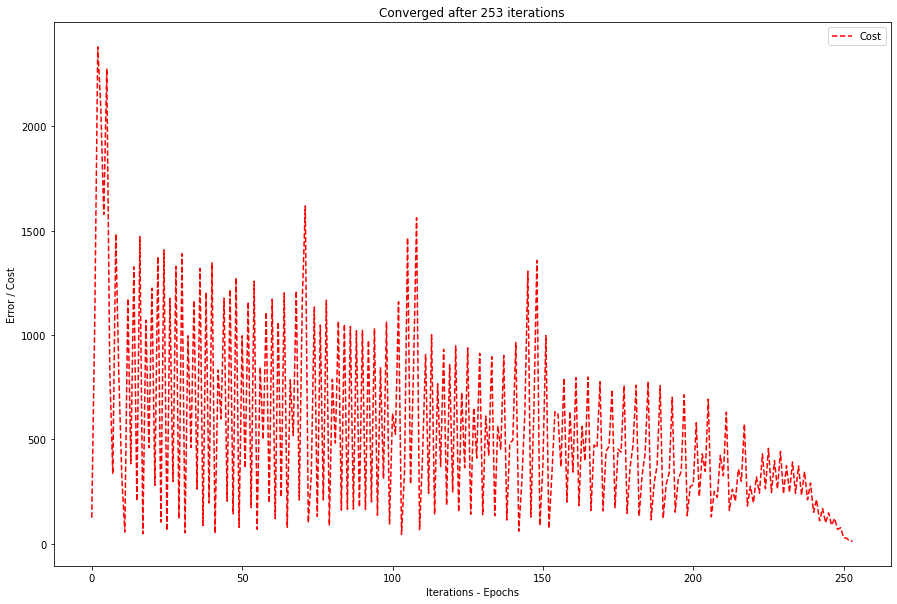

In [345]:
print('W',W) # Printing the weights
# Plotting the cost over epochs

plt.figure(figsize=(15,10))
plt.title('Converged after '+str(actual_iters)+' iterations')
plt.plot(range(len(cost_list)), cost_list, 'r--', label='Cost')
plt.xlabel('Iterations - Epochs')
plt.ylabel('Error / Cost')
plt.legend()
plt.show()

### Note that the model converged after 281 iterations as $\Delta$ L(w,j) was lower than threshold $\epsilon$ =3e-3 

In [346]:
cost_list

[124.68971772931432,
 1068.2990626746528,
 2379.929625078533,
 2091.489186363666,
 1577.1202331033828,
 2276.5580196185674,
 823.6519528247834,
 334.78123127767486,
 1485.0593002519531,
 811.1705034486257,
 319.13766989547094,
 56.83980842365998,
 1174.5729746394293,
 383.3492716344279,
 1326.2508010131144,
 205.05084732176286,
 1470.8531090024933,
 48.65175382289651,
 1071.4067669327533,
 460.3931414907153,
 1223.8652343417764,
 280.21289101458603,
 1375.2050539598868,
 103.90799065408534,
 1407.4060875543514,
 62.96293426254278,
 1175.679451761803,
 297.6778662523888,
 1328.0225629093497,
 119.46779548699254,
 1389.4578628574002,
 52.59298697731563,
 996.2846182806084,
 461.358741831992,
 1165.7177847727633,
 262.1636945869322,
 1318.661095629625,
 87.69915983503735,
 1205.217576532115,
 195.48361618031473,
 1345.7009891943171,
 49.68824999677075,
 832.6944234736866,
 598.8849910593078,
 1176.5348844537127,
 204.54530277530492,
 1218.047638695452,
 142.9401046839447,
 1274.5423159871

In [347]:
# Applying the resulting W, b (one vector) to the test data
x0=np.repeat(1, len(X_test)) # Generating an additional feature of 1s that will be concatinated to the dataset, which will help with bias calculation
X_test= np.c_[x0,X_test] # The feature of 1s is added to the matrix
W=np.squeeze(W) # Get rid of single dimentional entries. In this case a [[n0,...,nm]] becomes [n0,...nm] - easier for coding
predictions=np.round((softmax(W.T@X_test.T)),3)
predictions

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.993, 0.   , 1.   , 0.   ,
        0.   , 1.   , 1.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   , 0.999, 0.889, 1.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        1.   , 0.   , 0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.   , 0.032,
        0.   , 0.   , 0.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   ,
        0.   , 0.001, 0.111, 0.   , 0.   , 0.   , 1.   , 1.   , 0.022,
        0.   , 0.   , 0.   , 0.   , 0.001, 0.999, 1.   , 1.   , 0.   ,
        1.   , 0.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.633],
       [1.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   , 0.968,
        1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
        1.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.978,
        0.   , 1.   , 1.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
    

### We transpose predictions to help visualize the softmax output for the three classes. Softmax helps us minimize the value of the wrong classes and maximize the ones of the correct classes.

In [348]:
predictions.T 

array([[0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.993, 0.007, 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.032, 0.968],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.999, 0.001, 0.   ],
       [0.889, 0.111, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.022, 0.978],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.999, 0.001, 0.   ],
       [0.001, 0.999, 0.   ],
       [0.

### We use a simple numpy method (np.where) to transform the model prediction to the respective classes by identifiying the values >0.50 as 1 and 0 otherwise. You are free to adjust this threshold as needed. We plug that result and compare it with the truth labels of our test set and make a simple calculation to determine the accuracy of the model

In [349]:
# We compare the results with the original test labels and see 100% accuracy for our logistic regression model
accuracy=(np.where(predictions<0.5, 0,1)).T==y_test
accuracy

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

### We will only consider an output correct if the three labels predicted by the model match the ground truth labels of the test set, hence the use of result.all()==True

In [350]:
# Report on model accuracy
ctr=0
for result in accuracy:
    if result.all()==True:
        ctr+=1
print('Model accuracy is', ctr/len(accuracy)*100,'%')

Model accuracy is 97.77777777777777 %


### If you want to check the actual labels, simply use the inverse_transform function of the OneHotEncoder instance we trained eariler. See the example below

In [351]:
enc.inverse_transform(predictions.T)

array([[2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])